# GRIP - Data Science and Business Analytics

# Task 1 - Prediction Using Supervised Learning

# Problem Statement:Predict the Percentage of an student based on the no.of study hours

## Author : Anju S

In [1]:
#Importing required libraries

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [3]:
#Reading the dataset

In [4]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.shape

(25, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
#visualizing the data

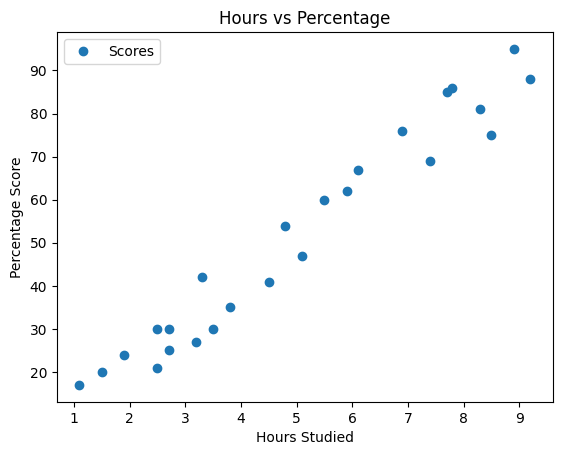

In [11]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [12]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


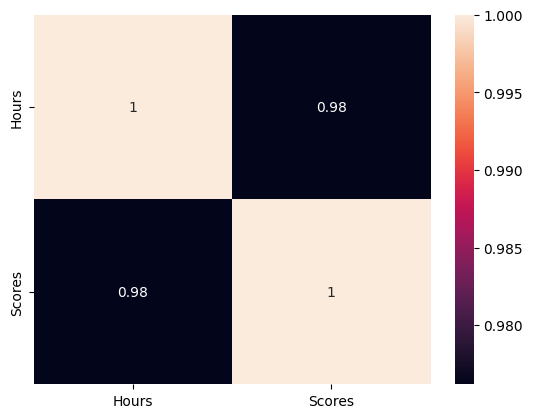

In [13]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

##### **Preparing the data**



In [14]:
X =  data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [15]:
#splitting the data into Training and Testing

In [16]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**


In [17]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 



LinearRegression()

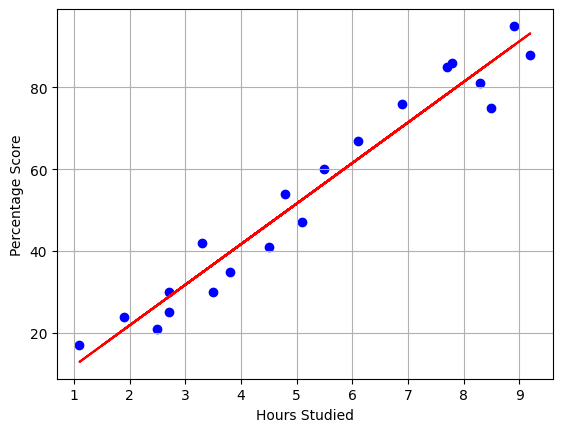

In [18]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the training data

plt.scatter(X_train, y_train, color='blue')
plt.plot(X, line, color='red');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

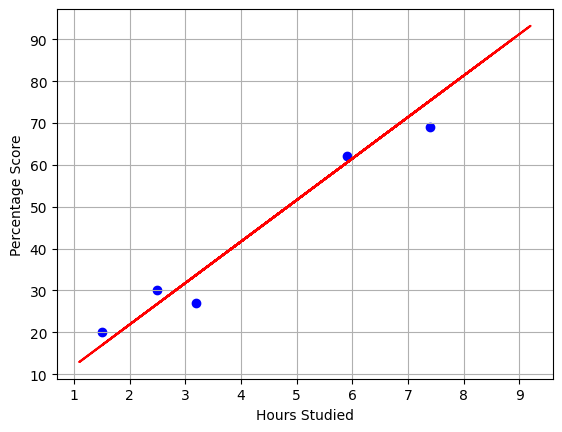

In [19]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data

plt.scatter(X_test, y_test, color='blue')
plt.plot(X, line, color='red');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()
     

### **Making Predictions**


In [20]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
# You can also test with your own data
hour = [[9.25]]
own_pred = regressor.predict(hour)
print("No of Hours = {}".format(hour))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737535


# Evaluating the Model

In [23]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Average Cost:',y_test.mean())
print('R-Squared',metrics.r2_score(y_test,y_pred))


MAE: 4.183859899002975
RMSE: 4.647447612100367
Average Cost: 41.6
R-Squared 0.9454906892105355


# THANK YOU